# Dependencies

In [2]:
pacman::p_load(factoextra)

# Functions

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [4]:
hla <- xlsx::read.xlsx(file = paste0(datapath, "/HLA/UHN-20230127-B257-HLA.xlsx"), sheetIndex = 1)

In [5]:
hla[ hla$Sample.ID == "396-02",]

,Sample.ID,Locus,Allele.1,Allele.2,Comments,Diploid.Ambiguities,Allele.1.Ambiguities,Allele.2.Ambiguities
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
424,396-02,A,A*03:01:01,A*03:01:01,,,,
425,396-02,B,B*07:02:01,B*18:01:01,,,,
426,396-02,C,C*07:02:01,C*12:03:01,,,,
427,396-02,DPA1,DPA1*01:03:01,DPA1*01:03:01,,,,
428,396-02,DPB1,DPB1*02:01:02,DPB1*04:01:01,,,,
429,396-02,DQA1,DQA1*01:02:01,DQA1*02:01:01,,,,
430,396-02,DQB1,DQB1*02:02:01,DQB1*06:02:01,,,,
431,396-02,DRB1,DRB1*07:01:01,DRB1*15:01:01,,,,
432,396-02,DRB345,DRB4*01:01:01,DRB5*01:01:01,,,,


In [6]:
hlafiles <- list.files(path = paste0(datapath, "/HLA/"), pattern = "INT", full.names = TRUE)

In [7]:
hlafiles

[1] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_A.txt"     
[2] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_B.txt"     
[3] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_C.txt"     
[4] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DPA1.txt"  
[5] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DPB1.txt"  
[6] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DQA1.txt"  
[7] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DQB1.txt"  
[8] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DRB1.txt"  
[9] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DRB345.txt"

In [8]:
hlas <- lapply(hlafiles, function(x) {
  read.table(x, header = TRUE, sep = "\t", stringsAsFactors = FALSE, check.names = F)
})

Allele frequencies

In [9]:
afs <- lapply(hlas, function(x) {
    n <- colSums(x)
    freq <- colSums(x) / (2 * nrow(x))
    data.frame(type=names(freq), freq, n)
})

In [10]:
lowfreq <- lapply(afs, function(x) {
    subset(x, freq < 0.01 | freq > 0.99)$type
})

In [11]:
lowfreq

[[1]]
 [1] "A*24:25"    "A*02:02:01" "A*02:06:01" "A*68:02:01" "A*36:01:01"
 [6] "A*68:152"   "A*68:10"    "A*26:02:01" "A*02:03:01" "A*80:01:01"
[11] "A*30:04:01" "A*68:03:01"

[[2]]
 [1] "B*41:01:01" "B*35:12:01" "B*15:32:01" "B*35:17:01" "B*14:02:01"
 [6] "B*52:01:02" "B*35:02:01" "B*39:05:01" "B*39:01:01" "B*35:14:01"
[11] "B*35:05:01" "B*50:01:01" "B*56:01:01" "B*39:02:02" "B*58:01:01"
[16] "B*41:02:01" "B*15:16:01" "B*15:17:01" "B*40:02:01" "B*57:03:01"

[[3]]
[1] "C*16:112"   "C*16:02:01" "C*07:18:01" "C*17:03:01" "C*07:01:02"
[6] "C*08:02:01" "C*18:02:01"

[[4]]
[1] "DPA1*01:05"        "DPA1*02:01:07"     "DPA1*01:33:01"    
[4] "DPA1*02:01:02"     "DPA1*01:06:01"     "DPA1*03:01:01"    
[7] "DPA1*02:06"        "DPA1*03:05:01:01Q"

[[5]]
[1] "DPB1*09:01:01"  "DPB1*698:01"    "DPB1*519:01"    "DPB1*124:01:01"
[5] "DPB1*40:01:01"  "DPB1*16:01:01"  "DPB1*14:01:01" 

[[6]]
[1] "DQA1*05:09:01" "DQA1*01:05:01" "DQA1*04:02"    "DQA1*05:03:01"
[5] "DQA1*04:01:02"

[[7]]
[1] "DQB1*04:01:01" "DQB1*03:05:01" "DQB1*05:01:24"

[[8]]
 [1] "DRB1*10:01:01" "DRB1*14:02:01" "DRB1*11:34"    "DRB1*13:03:01"
 [5] "DRB1*08:04:01" "DRB1*04:03:01" "DRB1*13:04"    "DRB1*15:02:02"
 [9] "DRB1*08:02:01" "DRB1*08:06:01" "DRB1*11:03:01"

[[9]]
character(0)

In [12]:
hlas_lowfreqrm <- purrr::map2(hlas, lowfreq, function(x, y) {
    x[, !colnames(x) %in% y]
})

hwe

In [13]:
hwe.fx <- function(x) {
    x <- as.numeric(x)
    # observed counts
    a0 <- length(x[x == 0])
    a1 <- length(x[x == 1])
    a2 <- length(x[x == 2])
    freq <- sum(x) / (2 * length(x))
    # get expected frequencies
    P_a0 <- (1 - freq)^2
    P_a1 <- 2 * (1 - freq) * freq
    P_a2 <- freq^2
    chitest <- chisq.test(c(a0, a1, a2), p = c(P_a0, P_a1, P_a2)) #  Pearson's chi-squared goodness-of-fit test compared to expected frequencies
    chitest$p.value#[chitest$p.value <= 1e-04]
}

In [14]:
hwe_chip <- lapply(hlas_lowfreqrm, function(x) {
    apply(x, 2, hwe.fx) 
})

Warning message in chisq.test(c(a0, a1, a2), p = c(P_a0, P_a1, P_a2)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(c(a0, a1, a2), p = c(P_a0, P_a1, P_a2)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(c(a0, a1, a2), p = c(P_a0, P_a1, P_a2)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(c(a0, a1, a2), p = c(P_a0, P_a1, P_a2)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(c(a0, a1, a2), p = c(P_a0, P_a1, P_a2)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(c(a0, a1, a2), p = c(P_a0, P_a1, P_a2)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(c(a0, a1, a2), p = c(P_a0, P_a1, P_a2)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(c(a0, a1, a2), p = c(P_a0, P_a1, P_a2)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(c(a0, a1, a2), p = c(P_a0, P_a1, P_a2)):
"

In [15]:
sig_hwe_chip <- lapply( hwe_chip, function(x) x[x <= 1e-04] )

In [16]:
sig_hwe_chip

[[1]]
  A*32:01:01 
2.825757e-15 

[[2]]
named numeric(0)

[[3]]
named numeric(0)

[[4]]
named numeric(0)

[[5]]
DPB1*11:01:01 
 2.825757e-15 

[[6]]
named numeric(0)

[[7]]
named numeric(0)

[[8]]
DRB1*11:04:01 
 4.798108e-07 

[[9]]
named numeric(0)

In [17]:
hlas_lowfreqrm_hwe <- purrr::map2(hlas_lowfreqrm, sig_hwe_chip, function(x, y) {
    x[, !colnames(x) %in% names(y)]
})

In [18]:
lapply(hlas_lowfreqrm_hwe, function(x)dim(x))

[[1]]
[1] 67 16

[[2]]
[1] 67 21

[[3]]
[1] 67 15

[[4]]
[1] 67  4

[[5]]
[1] 67 16

[[6]]
[1] 67 13

[[7]]
[1] 67 15

[[8]]
[1] 67 22

[[9]]
[1] 67 12

In [19]:
allhlas <- hlas_lowfreqrm_hwe[[1]]

In [20]:
for(i in 2:length(hlas_lowfreqrm_hwe)){
x <- hlas_lowfreqrm_hwe[[i]]
x <- x[rownames(allhlas),] # make sure the same rows are in the same order
allhlas <- cbind(allhlas, x)
}

In [21]:
head(allhlas)

,A*02:01:01,A*01:01:01,A*11:01:01,A*26:01:01,A*31:01:02,A*03:01:01,A*02:05:01,A*23:01:01,A*24:02:01,A*30:01:01,...,DRB345*Not_Present,DRB5*01:01:01,DRB4*01:03:01,DRB3*03:01:01,DRB4*01:01:01,DRB3*01:62:01,DRB4*01:03:02,DRB5*02:02:01,DRB5*01:02:01,DRB4*01:03:01:02N
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
315-05,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
319-05,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323-03,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
329-04,0,0,0,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
330-05,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
331-04,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


LD pruning

In [22]:
cormat <- cor(allhlas)

remove <- c()
for( i in 1:ncol(allhlas) ){    
    if( is.element(i, remove) ){ next } else {
        r2 <- cormat[,i]^2
        ldmarker <- ( 1:ncol(allhlas) )[ r2 > 0.5 ]
        ldmarker <- setdiff(ldmarker, i) #keep self
        remove <- c(remove, ldmarker)
    }
}

In [23]:
cormat[remove,remove, drop = F]

,B*08:01:01,C*07:04:01,DPB1*01:01:02,DRB1*04:07:01,C*07:02:01,C*12:03:01,C*02:02:02,C*17:01:01,C*02:10:01,C*03:04:01,...,DRB1*09:01:02,DRB4*01:03:02,DRB1*11:01:02,DRB1*13:02:01,DRB3*03:01:01,DQB1*04:02:01,DRB3*01:62:01,DRB5*01:02:01,DQB1*05:01:01,DQB1*02:02:01
B*08:01:01,1.00000000,-0.08606630,-0.08606630,-0.08606630,-0.10474044,-0.243440571,0.14791073,-0.10622957,-0.08606630,-0.082597366,...,-0.13933620,-0.10622957,-0.08606630,-0.15388118,-0.15388118,0.079190896,-0.08606630,-0.08606630,-0.066507516,0.023073301
C*07:04:01,-0.08606630,1.00000000,-0.03076923,-0.03076923,0.14411534,0.107338853,-0.04981355,-0.03797773,-0.03076923,-0.069098016,...,-0.04981355,-0.03797773,-0.03076923,-0.05501347,-0.05501347,-0.059914469,-0.03076923,0.48461538,0.125571470,-0.097022155
DPB1*01:01:02,-0.08606630,-0.03076923,1.00000000,-0.03076923,-0.07045639,-0.087031502,-0.04981355,-0.03797773,-0.03076923,-0.069098016,...,-0.04981355,-0.03797773,0.48461538,-0.05501347,-0.05501347,-0.059914469,-0.03076923,-0.03076923,0.125571470,0.074043224
DRB1*04:07:01,-0.08606630,-0.03076923,-0.03076923,1.00000000,-0.07045639,0.107338853,0.28393722,-0.03797773,-0.03076923,0.188100155,...,-0.04981355,-0.03797773,-0.03076923,-0.05501347,-0.05501347,-0.059914469,-0.03076923,-0.03076923,-0.090153876,-0.097022155
C*07:02:01,-0.10474044,0.14411534,-0.07045639,-0.07045639,1.00000000,-0.037441907,-0.11406469,-0.08696264,-0.07045639,-0.158222889,...,-0.11406469,-0.08696264,-0.07045639,-0.12597163,-0.12597163,-0.017817416,-0.07045639,-0.07045639,0.063003587,-0.150944297
C*12:03:01,-0.24344057,0.10733885,-0.08703150,0.10733885,-0.03744191,1.000000000,-0.01502921,-0.10742090,-0.08703150,-0.098446564,...,-0.14089881,-0.10742090,-0.08703150,0.19191518,0.19191518,-0.061331820,-0.08703150,0.10733885,-0.010928674,-0.080884478
C*02:02:02,0.14791073,-0.04981355,-0.04981355,0.28393722,-0.11406469,-0.015029206,1.00000000,-0.06148367,-0.04981355,0.054689831,...,-0.08064516,-0.06148367,-0.04981355,-0.08906352,-0.08906352,-0.096997949,-0.04981355,-0.04981355,-0.006255160,0.064482632
C*17:01:01,-0.10622957,-0.03797773,-0.03797773,-0.03797773,-0.08696264,-0.107420904,-0.06148367,1.00000000,-0.03797773,-0.085286030,...,-0.06148367,-0.04687500,0.38610688,0.18484381,0.18484381,0.161987899,0.38610688,-0.03797773,0.243744744,-0.119752127
C*02:10:01,-0.08606630,-0.03076923,-0.03076923,-0.03076923,-0.07045639,-0.087031502,-0.04981355,-0.03797773,1.00000000,0.188100155,...,-0.04981355,-0.03797773,-0.03076923,0.25214506,0.25214506,-0.059914469,-0.03076923,-0.03076923,0.125571470,0.245108602
C*03:04:01,-0.08259737,-0.06909802,-0.06909802,0.18810015,-0.15822289,-0.098446564,0.05468983,-0.08528603,0.18810015,1.000000000,...,0.05468983,0.12634967,-0.06909802,0.02974182,0.02974182,0.008542797,-0.06909802,0.18810015,0.012854429,-0.047143896


In [24]:
remove <- unique(remove)
keep <- setdiff(1:ncol(allhlas), remove)

allhlas_1 <- allhlas[, keep]
dim(allhlas_1)

[1] 67 93

In [25]:
dim(allhlas)

[1]  67 134

PCA

In [26]:
mypca <- prcomp(allhlas, scale = TRUE)

In [27]:
out <- mypca$x
mydf <- data.frame(out)

In [28]:
summary(mypca)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.86302 2.77215 2.59636 2.53675 2.41253 2.34816 2.3325
Proportion of Variance 0.06117 0.05735 0.05031 0.04802 0.04344 0.04115 0.0406
Cumulative Proportion  0.06117 0.11852 0.16883 0.21685 0.26029 0.30143 0.3420
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     2.23168 2.12627 2.04917 2.00695 1.97282 1.93531 1.91864
Proportion of Variance 0.03717 0.03374 0.03134 0.03006 0.02905 0.02795 0.02747
Cumulative Proportion  0.37920 0.41294 0.44428 0.47434 0.50338 0.53133 0.55880
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.82635 1.81609 1.78353 1.73287 1.69281 1.59455 1.53691
Proportion of Variance 0.02489 0.02461 0.02374 0.02241 0.02139 0.01897 0.01763
Cumulative Proportion  0.58370 0.60831 0.63205 0.65446 0.67584 0.69482 0.71244
                          PC22

In [29]:
head(mydf)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
315-05,1.15890201,-2.898493,-3.4723486,3.3513972,-1.2856095,1.3652377,-0.98814450,0.3025367,-2.4434325,0.7885129,...,-0.71596361,0.04809325,0.31848056,0.3792461,0.48432470,-0.31782748,-0.15632117,0.11953686,0.0143342286,-2.666270e-15
319-05,-4.56374676,-1.367813,2.0296584,-0.8423059,-0.7075454,-2.2932518,1.85458779,0.7702846,-0.5651254,1.6015236,...,0.29018989,0.80729791,0.29301440,0.1399793,0.22943811,-0.69063112,0.19551515,-0.08730404,-0.0411502225,1.908196e-17
323-03,4.29021503,-1.655735,-1.5965245,0.1538018,1.9207118,-1.5288560,3.20844423,-3.1797025,3.5822593,-1.8978836,...,0.03685141,-0.04265836,-0.04030207,-0.1558266,-0.07187716,-0.08719310,-0.01660297,-0.05961457,0.0770658974,1.462372e-15
329-04,-4.25557065,0.314588,-4.4081750,-1.0062229,4.8715689,-0.2699918,-1.20600856,-0.9781981,1.8880483,0.7504148,...,0.84360989,0.10208720,-0.38351856,0.1420335,0.07055897,0.30820487,0.01584124,0.03888392,-0.1613784630,-3.278627e-16
330-05,-0.08941476,-2.768304,2.1200714,-3.4903109,-1.0884092,-1.3053444,-0.04510793,-2.1610084,-0.1333316,1.4136399,...,0.37172788,-0.07073121,0.16185579,0.3380909,0.34679493,0.13256591,-0.01518200,-0.02311564,-0.1974133531,1.115427e-15
331-04,3.44426309,4.036729,0.8425664,-0.1457962,1.5503795,0.8197901,1.79551677,0.8606525,-2.9234943,0.1003881,...,-0.85429907,0.60078922,0.78459363,-0.1427119,0.11234774,0.04738167,-0.21322384,-0.04261676,-0.0001452749,4.631712e-16


In [30]:
readr::write_rds(mydf, paste0(datapath, "/HLA/INT_HLA_PCA_postqc.rds"))

In [31]:
p0 <- fviz_pca_ind(mypca,geom = "point", pointshape = 16, pointsize = 2, alpha = 1,
                    ellipse.alpha = 0, invisible="quali",
                       title = "PCA of HLA types (n = 67)")

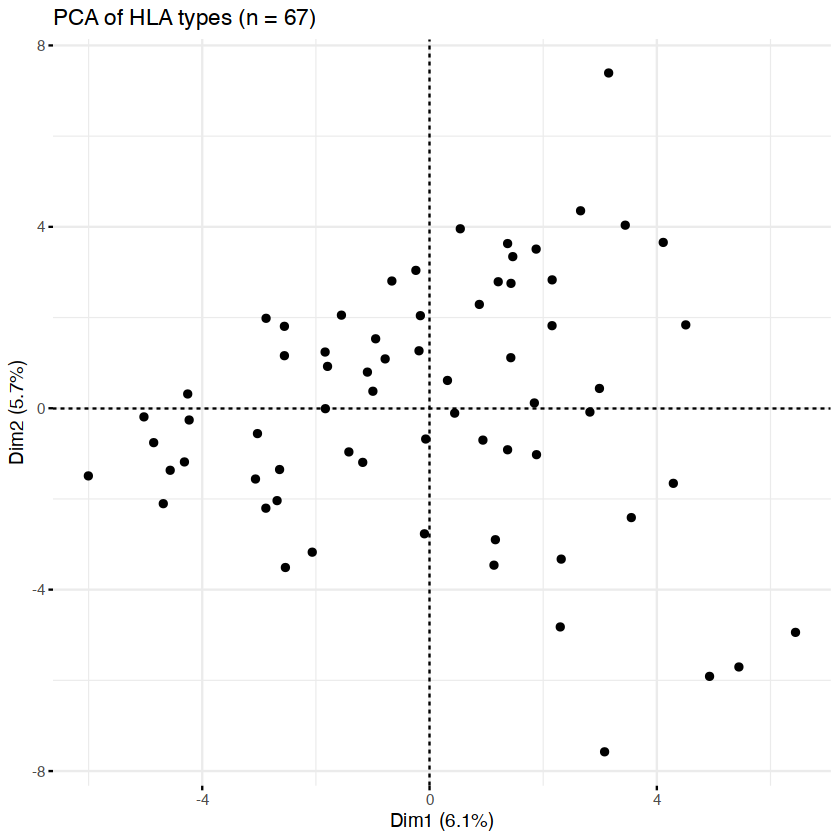

In [32]:
p0